## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Pfad & CSV einlesen

In [3]:
csv_path = "../data/raw/dayahead_2024_11.csv"

df = pd.read_csv(
    csv_path,
    sep=",",                      # default for Energy-Charts CSV
    decimal=".",                  # decimal separator
    parse_dates=["Datum (MEZ)"],  # parse timestamp column as datetime
)

df.head()

,Datum (MEZ),Nicht Erneuerbar,Erneuerbar,Day Ahead Auktion
0,2024-11-01 00:00:00+01:00,18606.86005,27845.06134,77.29
1,2024-11-01 00:15:00+01:00,18244.17649,28342.96273,67.70
2,2024-11-01 00:30:00+01:00,18016.70376,28271.47496,59.90
3,2024-11-01 00:45:00+01:00,17696.91384,28386.76327,51.90
4,2024-11-01 01:00:00+01:00,17220.25714,28011.97014,57.59


## Spalten prüfen

In [4]:
df.columns.tolist()

['Datum (MEZ)', 'Nicht Erneuerbar', 'Erneuerbar', 'Day Ahead Auktion']

## Index setzen & nur relevante Spalten behalten

In [5]:
df = df.set_index("Datum (MEZ)")

# Keep only the price column (optional)
prices_15min = df["Day Ahead Auktion"].astype(float)

prices_15min.head()

Datum (MEZ)
2024-11-01 00:00:00+01:00    77.29
2024-11-01 00:15:00+01:00    67.70
2024-11-01 00:30:00+01:00    59.90
2024-11-01 00:45:00+01:00    51.90
2024-11-01 01:00:00+01:00    57.59
Name: Day Ahead Auktion, dtype: float64

## 15-Minuten-Preise plotten

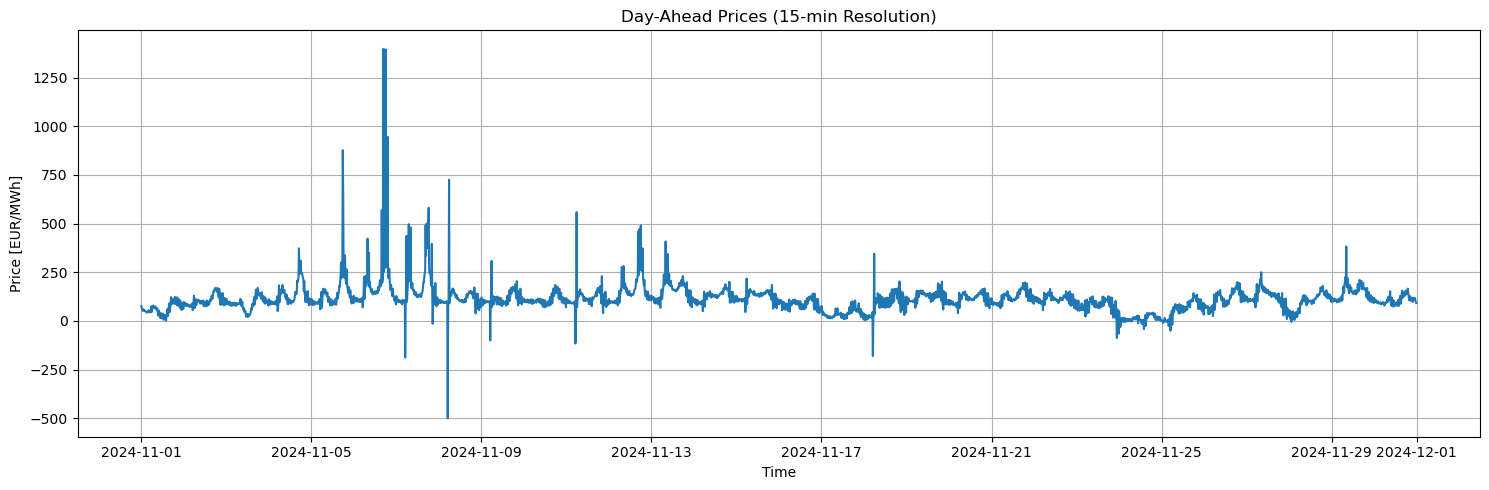

In [7]:
plt.figure(figsize=(15, 5))
plt.plot(prices_15min)
plt.title("Day-Ahead Prices (15-min Resolution)")
plt.ylabel("Price [EUR/MWh]")
plt.xlabel("Time")
plt.grid(True)
plt.tight_layout()
plt.show()

## Auf 1 Stunde aggregieren (für BatteryEnv mit dt_hours=1.0)

In [9]:
prices_1h = prices_15min.resample("1h").mean()

prices_1h.head(), prices_1h.shape

(Datum (MEZ)
 2024-11-01 00:00:00+01:00    64.1975
 2024-11-01 01:00:00+01:00    56.2275
 2024-11-01 02:00:00+01:00    49.9025
 2024-11-01 03:00:00+01:00    44.9250
 2024-11-01 04:00:00+01:00    50.1650
 Freq: h, Name: Day Ahead Auktion, dtype: float64,
 (720,))

## Stündliche Preise plotten

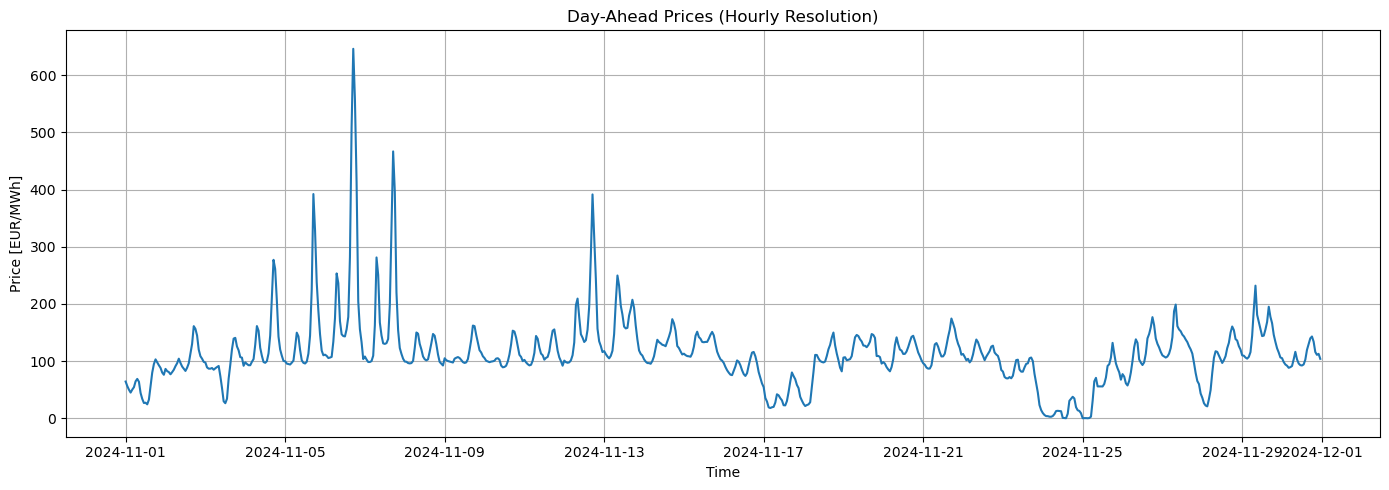

In [10]:
plt.figure(figsize=(14, 5))
plt.plot(prices_1h)
plt.title("Day-Ahead Prices (Hourly Resolution)")
plt.ylabel("Price [EUR/MWh]")
plt.xlabel("Time")
plt.grid(True)
plt.tight_layout()
plt.show()

## Load and preprocess day-ahead electricity price data

In [6]:
from utils.data_loader import load_price_data

csv_path = "../data/raw/dayahead_2024_11.csv"

df, price_series, timestamps = load_price_data(csv_path, resolution="1h")
df.head()

,Nicht Erneuerbar,Erneuerbar,Day Ahead Auktion
Datum (MEZ),,,
2024-11-01 00:00:00+01:00,18141.163535,28211.565575,64.1975
2024-11-01 01:00:00+01:00,16762.893740,27801.153758,56.2275
2024-11-01 02:00:00+01:00,15753.801843,28020.887427,49.9025
2024-11-01 03:00:00+01:00,15673.267653,27061.248645,44.9250
2024-11-01 04:00:00+01:00,14630.770720,27138.154085,50.1650
